## Partie 1 : Manipulation de dataframe et nettoyage de données 
#### 1.	Importez le fichier all_players.csv dans un dataframe pandas all_players et affichez les 5 premières lignes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuration d'affichage
%matplotlib inline
sns.set(style = 'whitegrid')

In [5]:
## importation de la base de données
df = pd.read_csv('all_players.csv')
df.head()

,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,1,Kylian Mbappé,91,97,90,80,92,36,78,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,2,Rodri,91,66,80,86,84,87,85,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,4,Erling Haaland,91,88,92,70,81,45,88,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,5,Jude Bellingham,90,80,87,83,88,78,83,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,7,Vini Jr.,90,95,84,81,91,29,69,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


#### 2. Supprimez les doublons

In [7]:
df.drop_duplicates(inplace=True)

#### 3.	Supprimez les colonnes de la liste « to_delete »

In [11]:
to_delete=['Rank', 'Height', 'Weight','Alternative positions','Age','play style','url']
df.drop(columns=to_delete, inplace=True)

#### 4.	Transformer la colonne Preferred Foot en valeurs binaires. 0 pour les gauchers et 1 pour les droitiers. 

In [13]:
if 'Preferred foot' in df.columns:
  df['Preferred foot']=df['Preferred foot'].map({'Left':0, 'Right':1})

#### 5.	Vous isolerez les données des gardiens de but dans un dataframe all_gk et vous supprimerez les colonnes des attributs spécifiques aux gardiens de but dans le dataframe all_players.

In [15]:
all_dk=df[df['Position']=='GK']
df=df[df['Position'] !='GK']
gk_columns=['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
df.drop(columns=gk_columns, inplace=True)

#### 6.	Vos datasets contiennent-ils des valeurs manquantes ? Si oui traitez les avec la manière de votre choix. 

In [17]:
print(df.isnull().sum)
df.fillna(0,inplace=True)

<bound method DataFrame.sum of        Unnamed: 0   Name    OVR    PAC    SHO    PAS    DRI    DEF    PHY  \
0           False  False  False  False  False  False  False  False  False   
1           False  False  False  False  False  False  False  False  False   
2           False  False  False  False  False  False  False  False  False   
3           False  False  False  False  False  False  False  False  False   
4           False  False  False  False  False  False  False  False  False   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
17732       False  False  False  False  False  False  False  False  False   
17733       False  False  False  False  False  False  False  False  False   
17734       False  False  False  False  False  False  False  False  False   
17735       False  False  False  False  False  False  False  False  False   
17736       False  False  False  False  False  False  False  False  False   

       Acceleration  ...  Stamina  Strength 

## Partie 2 : Analyse exploratoire

#### 1.	Décrivez la variable OVR. Vous présenterez et commenterez les mesures de tendance et de dispersion.
#### La dispersion des valeurs est-elle étendue ou centrée ? La variable détient elle des outliers ?
#### Appuyez votre analyse avec les outils graphiques de votre choix.


count    15738.000000
mean        66.970263
std          6.932321
min         47.000000
25%         63.000000
50%         67.000000
75%         71.000000
max         91.000000
Name: OVR, dtype: float64


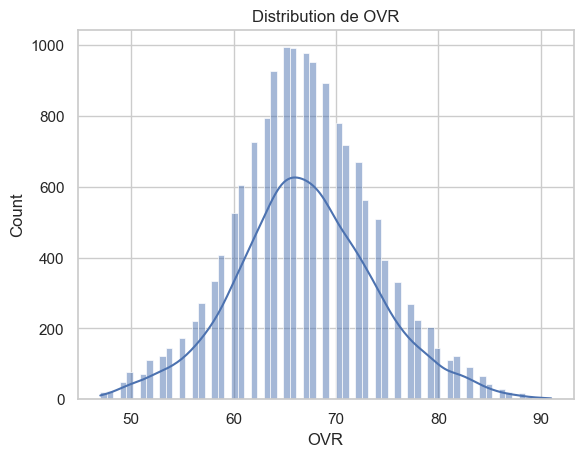

In [19]:
print(df['OVR'].describe())
sns.histplot(df['OVR'],kde=True)
plt.title('Distribution de OVR')
plt.show()

Dans la base de données nous avons un total de 15748 joeurs, avec une moyenne de 66.97 ce qui montre que globalement les joeurs ont une note moyenne autour de 76.Les joeurs les mlins notés ont un OVR de 47 et les plus  notés de 91. 25% des joeurs ont une note inférieur à 63.
L'histogramme montre une trisbution unimodale et symétrique, proche d'une distrubtion normale. Le pic centré vers la moyenne ce qui reflète une forte concentration des joueurs dans cette plage.

#### 2. Les gauchers sont réputés pour avoir un plus mauvais pied faible que les droitiers. Analysez les mesures de tendance centrale et de dispersion de la variable Weak Foot pour ces deux groupes. Comparez leurs distributions et formulez une hypothèse pour vérifier cette idée reçue.

2.85874840357599 3.053032225323522


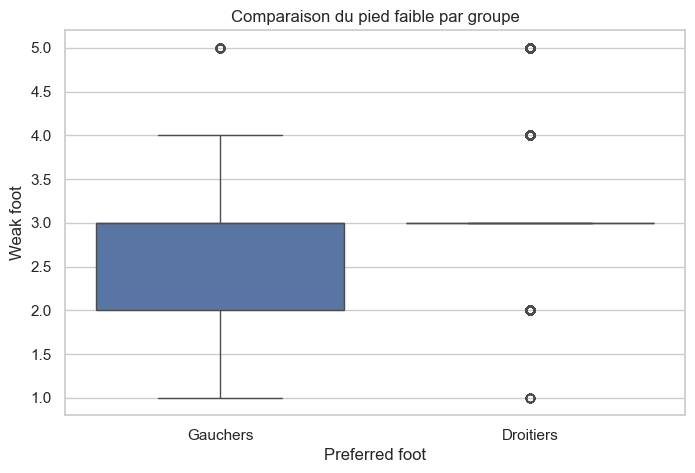

In [47]:
gauchers= df[df['Preferred foot']==0]
droitiers=df[df['Preferred foot']==1]
print(gauchers['Weak foot'].mean(),droitiers['Weak foot'].mean())

plt.figure(figsize=(8, 5))
sns.boxplot(x="Preferred foot", y="Weak foot", data=df)
plt.xticks([0, 1], ["Gauchers", "Droitiers"])
plt.title("Comparaison du pied faible par groupe")
plt.show()

On remarque que la moyenne des gauchers est inférieure à celle des droitiers? cela suggère que les droitiers ont en générale une meilleure note pour leur Weak foot.
Quand à la distributin (boxplot) les deux groupes présentes des valeurs minimum et maximales similaires, avec des droitiers montant une légère concentration vers le haut.
les droitiers montrent une dispersion légèrement plus importante, les gauchers semblent plus homogène dans leurs performances de pied faible.
Une hypothèse possible est que les droitiers ont un avantage dans le développement du pied faible en raison de leur fréquence dans la population.

#### 3.	Parmi les compétences PAC, SHO, PAS, DRI et DEF, déterminez laquelle ou lesquelles semblent avoir le plus d'impact sur la note générale (OVR) en fonction de votre poste. Vous effectuerez une matrice de corrélation pour les attaquants (ST), les milieux de terrain (CM) et les défenseurs (CB) afin d'analyser les relations entre ces variables. 

#### D’après vos résultats, quels sont les joueurs les plus complets ? 


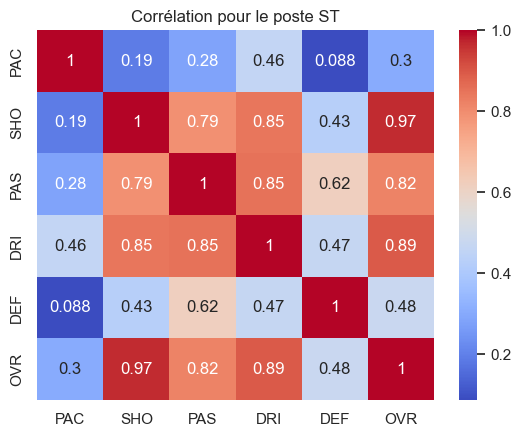

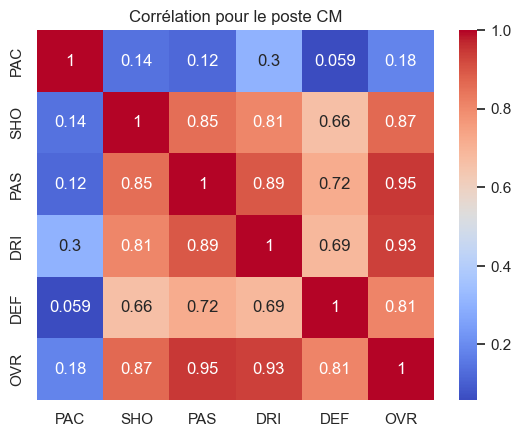

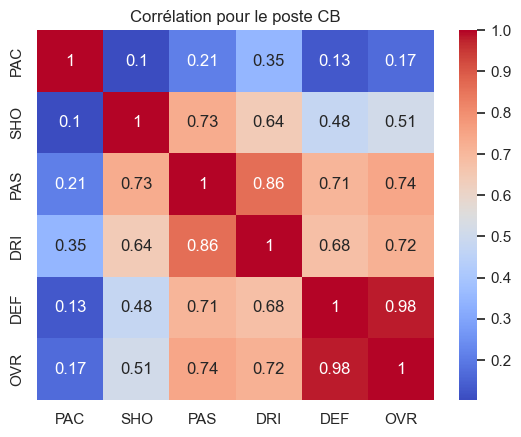

In [39]:
postes= ['ST','CM','CB']
for poste in postes:
  subset= df[df['Position']==poste]
  corr=subset[['PAC','SHO','PAS','DRI','DEF','OVR']].corr()
  sns.heatmap(corr,annot=True,cmap='coolwarm')
  plt.title(f'Corrélation pour le poste {poste}')
  plt.show()

##poste St (attaquant)
les compétence les plus corrélées avec OVR:
SHO: 0.97
DRI:0.89
PAS:0.82
La compétente SHO a un impact dominant pour les attaquants, suivie par le DRI et le PAS

##Poste CB
les compétence les plus corrélées avec OVR:
DEF: 0.98
PAS:0.74
DRI:0.72
La compétente DEF a un impact dominant pour les attaquants, suivie par le PAS et le DRI

##Poste CM
les compétence les plus corrélées avec OVR:
PAS: 0.98
DRI:0.74
SHO:0.72
La compétente PAS a un impact dominant pour les attaquants, suivie par le DRI et le SHO

Au  vue des resultats, le poste necéssitant une plus grande polyvalence est le poste de milieu de terrain CM